# SPEECH EMOTION RECOGNITION

## Introduction
The purpose of this project is to train a neural network to recognize emotion in English human speech.

**Speech Emotion Recognition (SER)** will be defined to be the act of teaching a neural network to recognize and identify emotions, from a given number of emotions, found in English auditory phrases. The motivation is to mimic how humans can interpret additional meaning in phrases which is not always reflected in the definition of the words in that sentence.

We will be comparing the performance of two models. The first model is a **LSTM (Long Short-Term Memory)** model and the second model is a **CNN (Convolutional Neural Network)** model.

## Datasets
The main dataset that will be used throughout this project is the dataset labeled **Speech Emotion Recognition (en)** compiled by **Dmitry Babko** which can be found [here](https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en) on **[kaggle](https://www.kaggle.com/)**.
It is a combination of four popular datasets which are labeled **CREMA-D** (Crowd-sourced Emotional Multimodal Actors Dataset), **RAVDESS** (Ryerson Audio-Visual Database of Emotional Speech and Song), **SAVEE** (Surrey Audio-Visual Expressed Emotion) and **TESS** (Toronto Emotional Speech Set).

## Exploratory Analysis of Data
Let us retrieve the data from these datasets so that we can perform some preprocessing and feature extraction steps, before we input it to our models. Each dataset includes multiple auditory phrases which are spoken in the different emotions and are the .wav file format.

In the **CREMA-D** dataset each file in structure in the following way: `1001_DFA_ANG_XX.wav`.

What we care about is the third bit, or in this case, `ANG`, which represents the emotion.

In this dataset there are 6 unique emotions which are as follows:
1. `ANG` - anger
2. `DIS` - disgust
3. `FEA` - fear
4. `HAP` - happiness
5. `NEU` - neutral
6. `SAD` - sadness

With this in mind let us now retrieve the **CREMA-D** dataset.

In [1]:
import os
import pandas as pd

crema_path = '../input/speech-emotion-recognition-en/Crema'

crema_to_emotion_dct = {
    'ANG': 'anger',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happiness',
    'NEU': 'neutral',
    'SAD': 'sadness',
}

crema_paths = []

for file in os.listdir(crema_path):
    emotion = crema_to_emotion_dct[file.split('_')[2]]
    crema_paths.append((emotion, crema_path+'/'+file))

crema_df = pd.DataFrame.from_dict(crema_paths)
crema_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
crema_df.head()

emotion                                               path
0    disgust  ../input/speech-emotion-recognition-en/Crema/1...
1  happiness  ../input/speech-emotion-recognition-en/Crema/1...
2  happiness  ../input/speech-emotion-recognition-en/Crema/1...
3    disgust  ../input/speech-emotion-recognition-en/Crema/1...
4    disgust  ../input/speech-emotion-recognition-en/Crema/1...

In the **RAVDESS** dataset each file in structure in the following way: `02-01-06-01-02-01-12.wav`.

What we care about is the third bit, or in this case, `06`, which represents the emotion.

In this dataset there are 8 emotions which are as follows:
1. `01` - neutral
2. `02` - calm
3. `03` - happiness
4. `04` - sadness
5. `05` - anger
6. `06` - fear
7. `07` - disgust
8. `08` - surprise

However due to the similarities between calm and neutral, as well as a widely accepted belief by psychologists, originally proposed by Paul Ekman, which suggests that "*...the six basic emotions are anger, disgust, fear, happiness, sadness, and surprise*", we will merge them to limit our emotions to the 6 aforementioned as well as no emotion, being neutral.

With this in mind let us now retrieve the **RAVDESS** dataset.

In [2]:
ravdess_path = '../input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24'

ravdess_to_emotion_dct = {
    '01': 'neutral',
    '02': 'neutral',
    '03': 'happiness',
    '04': 'sadness',
    '05': 'anger',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise',
}

ravdess_paths = []

for folder in os.listdir(ravdess_path):
    for file in os.listdir(ravdess_path+'/'+folder):
        emotion = ravdess_to_emotion_dct[file.split('-')[2]]
        ravdess_paths.append((emotion, ravdess_path+'/'+folder+'/'+file))

ravdess_df = pd.DataFrame.from_dict(ravdess_paths)
ravdess_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
ravdess_df.head()

emotion                                               path
0  surprise  ../input/speech-emotion-recognition-en/Ravdess...
1   neutral  ../input/speech-emotion-recognition-en/Ravdess...
2   disgust  ../input/speech-emotion-recognition-en/Ravdess...
3   disgust  ../input/speech-emotion-recognition-en/Ravdess...
4   neutral  ../input/speech-emotion-recognition-en/Ravdess...

In the **SAVEE** dataset each file in structure in the following way: `DC_a01.wav`.

What we care about is the letter before the number, or in this case, `a`, which represents the emotion.

In this dataset there are 7 unique emotions which are as follows:
1. `a` - anger
2. `d` - disgust
3. `f` - fear
4. `h` - happiness
5. `n` - neutral
6. `sa` - sadness
7. `su` - surprise

With this in mind let us now retrieve the **SAVEE** dataset.

In [3]:
savee_path = '../input/speech-emotion-recognition-en/Savee'

savee_to_emotion_dct = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise',
}

savee_paths = []

for file in os.listdir(savee_path):
    x = file.split('_')
    y = x[1][0:2] if x[1][0] == 's' else x[1][0]
    emotion = savee_to_emotion_dct[y]
    savee_paths.append((emotion, savee_path+'/'+file))

savee_df = pd.DataFrame.from_dict(savee_paths)
savee_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
savee_df.head()

emotion                                               path
0  happiness  ../input/speech-emotion-recognition-en/Savee/J...
1       fear  ../input/speech-emotion-recognition-en/Savee/K...
2  happiness  ../input/speech-emotion-recognition-en/Savee/D...
3    disgust  ../input/speech-emotion-recognition-en/Savee/D...
4      anger  ../input/speech-emotion-recognition-en/Savee/K...

In the **TESS** dataset each file in structure in the following way: `OAF_back_angry.wav`.

What we care about is the third bit, or in this case, `angry`, which represents the emotion.

In this dataset there are 7 unique emotions which are as follows:
1. `angry` - anger
2. `disgust` - disgust
3. `fear` - fear
4. `happy` - happiness
5. `neutral` - neutral
6. `sad` - sadness
7. `ps` - surprise

With this in mind let us now retrieve the **TESS** dataset.

In [4]:
tess_path = '../input/speech-emotion-recognition-en/Tess'

tess_to_emotion_dct = {
    'angry': 'anger',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'happiness',
    'neutral': 'neutral',
    'ps': 'surprise', # pleasant surprise
    'sad': 'sadness',
}

tess_paths = []

for folder in os.listdir(tess_path):
    for file in os.listdir(tess_path+'/'+folder):
        emotion = tess_to_emotion_dct[file.split('.')[0].split('_')[2]]
        tess_paths.append((emotion, tess_path+'/'+folder+'/'+file))

tess_df = pd.DataFrame.from_dict(tess_paths)
tess_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
tess_df.head()

emotion                                               path
0    fear  ../input/speech-emotion-recognition-en/Tess/YA...
1    fear  ../input/speech-emotion-recognition-en/Tess/YA...
2    fear  ../input/speech-emotion-recognition-en/Tess/YA...
3    fear  ../input/speech-emotion-recognition-en/Tess/YA...
4    fear  ../input/speech-emotion-recognition-en/Tess/YA...

Now let us join the dataframes into one collective dataframe.

(7442, 2)
(1440, 2)
(480, 2)
(2800, 2)

(12162, 2)



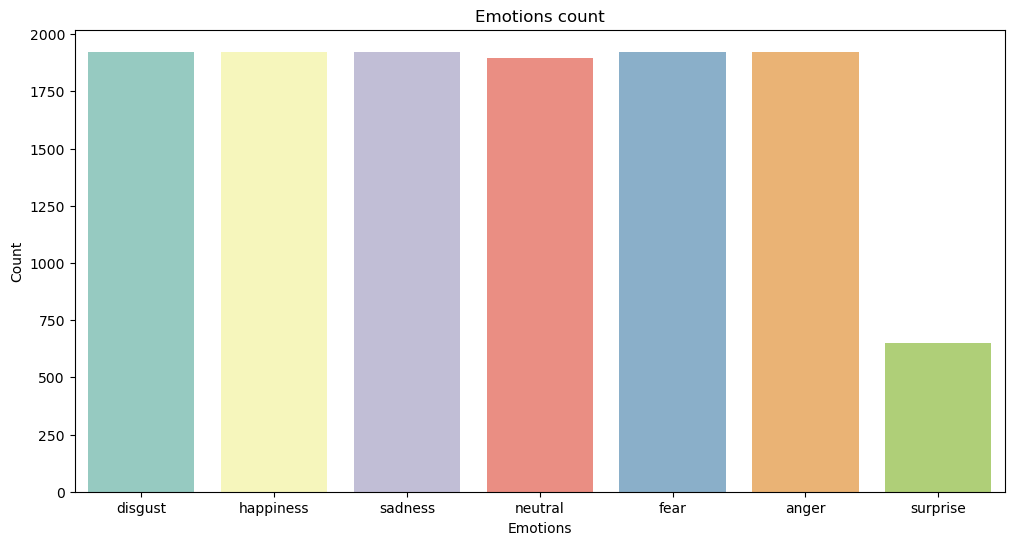

In [5]:
import matplotlib.pyplot as plt
import seaborn

print(crema_df.shape)
print(ravdess_df.shape)
print(savee_df.shape)
print(tess_df.shape)
print()

df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], axis=0)

print(df.shape)
print()

# Modified from: https://www.kaggle.com/code/lkergalipatak/speech-emotion-recognition-with-cnn?scriptVersionId=99779872&cellId=19
def plot_emotion_count(df):
    plt.figure(figsize=(12,6))
    plt.title('Emotions count')
    
    emotions = seaborn.countplot(x='emotion', data=df, palette='Set3')
    
    plt.xlabel('Emotions')
    plt.ylabel('Count')
    
    return plt

plot_emotion_count(df).show()

So all together we have 12162 different audio files covering 7 unique emotions which we will train our models to recognize.

### Preprocessing
To correctly preprocess the data we must first undertake the challenge of understanding how humans convey emotion within their speech. We will propose that this can be done by observing the characteristics of audio or sound. "*...the elements of sound should be listed separately as: pitch, duration, loudness, timbre, texture and spatial location*" (Russell Burton, 2015).

We would like to focus on pitch and duration as the key features to augment in each file. The reasoning being that not everyone has the same pitch, humans either have higher or lower voices and talk either faster or slower, changing the duration of the audio.

Another way to augment the audio will be to add noise to the sound. The idea behind this is to perhaps cover some of the audio with this noise to help the model identify when the actor is talking better.

The functions to augment the data are as follows.



In [6]:
import math
import numpy as np
import librosa

def add_noise(data):
    '''Signal to noise ratio is as follows: SNR = 2 * (A_signal - A_noise)
    according to the derivation on https://en.wikipedia.org/wiki/Signal-to-noise_ratio.'''
    A_signal = math.sqrt(np.mean(data**2))
    noise = np.random.normal(0, A_signal/3, data.shape)
    A_noise = math.sqrt(np.mean(noise**2))
    SNR = 2 * (A_signal - A_noise)
    return data + noise * SNR

def pitch_audio(data, sr, pitch_factor):
    '''A positive value increases the pitch, a negative value decreases it.
    For example, pitch_factor = 2.0 increases the pitch by 2 semitones (one octave).'''
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=pitch_factor)

def stretch_audio(data):
    '''Stretch the data a certain amount.'''
    amount = np.random.random()
    amount = amount if amount > 0.45 else amount + 0.45 # want to make sure audio isn't too long
    stretched_data = librosa.effects.time_stretch(y=data, rate=amount)
    return librosa.util.fix_length(data=stretched_data, size=len(data))

Let us observe the effect this has on our data through analyzing the waveform, spectrogram and listening to the audio itself.

To do this let us also create and import the following functions.

In [7]:
from IPython.display import Audio

# Modified from: https://www.kaggle.com/code/blitzapurv/speech-emotion-recognition-using-lstm?scriptVersionId=113306435&cellId=15
def generate_waveform(emotion, augmentation, filename, data, sr):
    '''Create a waveform with the data provided.'''
    plt.figure(figsize=(9, 4))
    plt.title(f'{augmentation.title()} {emotion.lower()} waveform | {filename}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (% Scale)') # time - floating point
    librosa.display.waveshow(y=data, sr=sr)
    return plt

# Modified from: https://www.kaggle.com/code/blitzapurv/speech-emotion-recognition-using-lstm?scriptVersionId=113306435&cellId=15
def generate_spectrogram(emotion, augmentation, filename, data, sr):
    '''Create a spectrogram with the data provided.'''
    x = librosa.stft(data) # time - frequency domain
    xdB = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(9, 4))
    plt.title(f'{augmentation.title()} {emotion.lower()} spectrogram | {filename}')
    librosa.display.specshow(xdB, sr=sr, x_axis='time', y_axis='hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    cb = plt.colorbar()
    cb.set_label('Amplitude (dB)', rotation=270, labelpad=20)
    return plt

Now let us retrieve the audio we will be observing these changes on.

In [8]:
filename = df.iat[0,1]
emotion = df.iat[0,0]

Let us now view and listen to the audio.

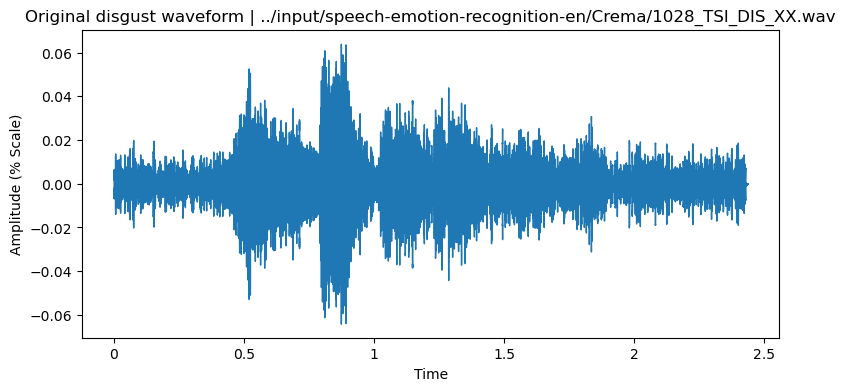

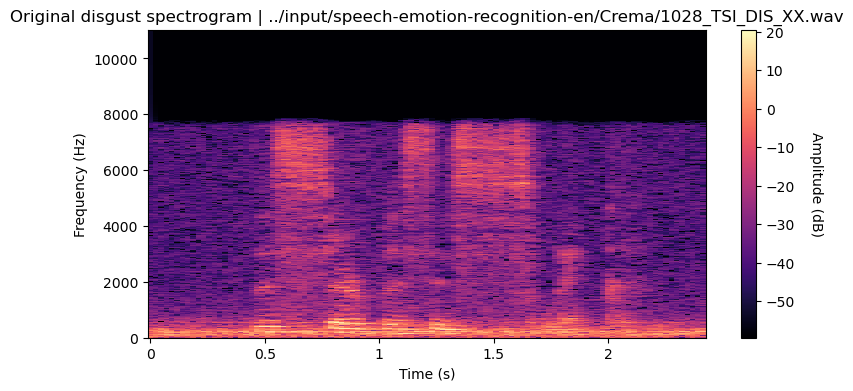

In [9]:
data, sr = librosa.load(filename)

generate_waveform(emotion, 'original', filename, data, sr).show()
print()
generate_spectrogram(emotion, 'original', filename, data, sr).show()
print()

Audio(data=data, rate=sr)

Let us perform the noise augmentation and observe the changes.

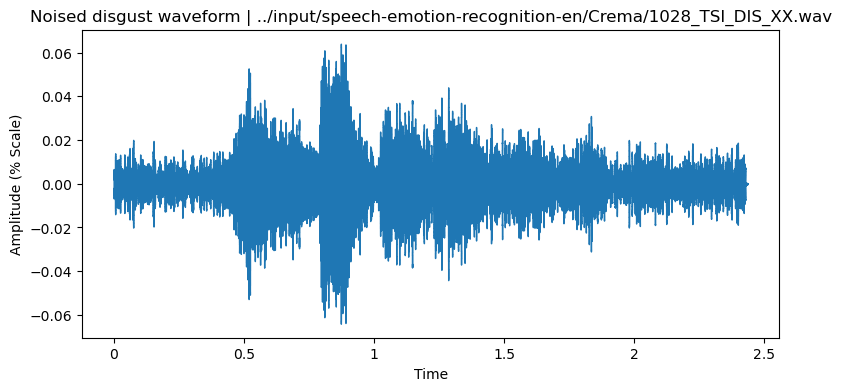

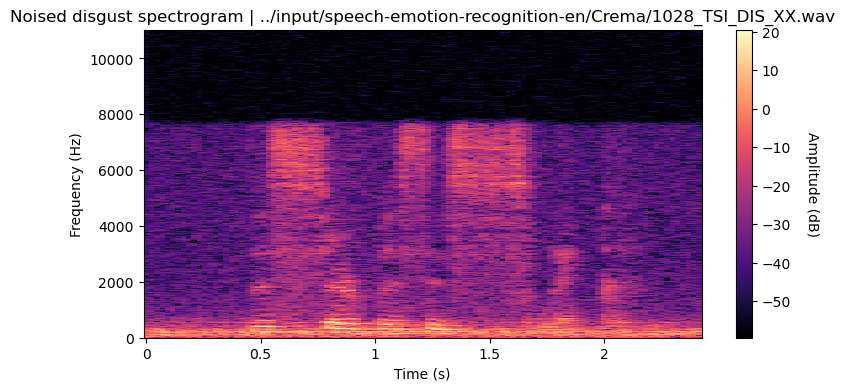

In [10]:
noised_data = add_noise(data)

generate_waveform(emotion, 'noised', filename, noised_data, sr).show()
print()
generate_spectrogram(emotion, 'noised', filename, noised_data, sr).show()
print()

Audio(data=noised_data, rate=sr)

Let us perform the pitch augmentation and observe the changes.

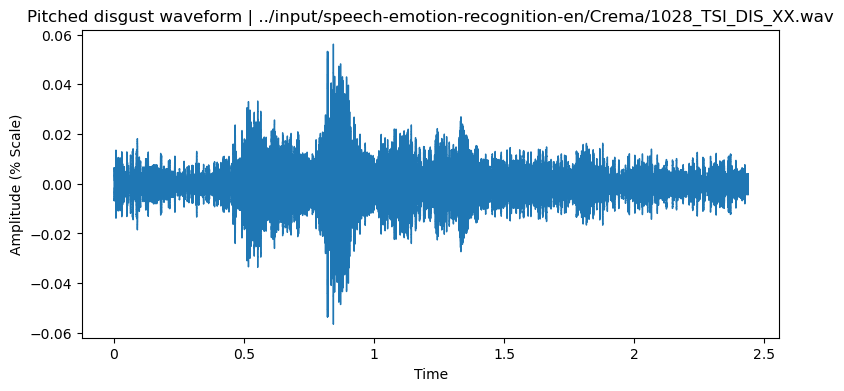

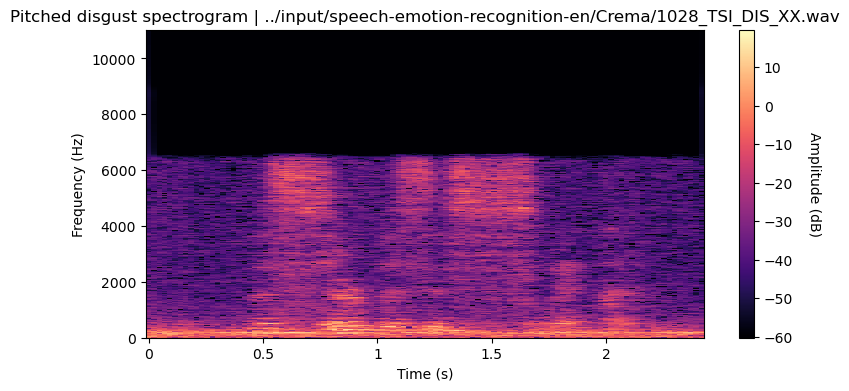

In [11]:
pitched_data = pitch_audio(data, sr, -3.0)

generate_waveform(emotion, 'pitched', filename, pitched_data, sr).show()
print()
generate_spectrogram(emotion, 'pitched', filename, pitched_data, sr).show()
print()

Audio(data=pitched_data, rate=sr)

Finally let us perform the stretch augmentation and observe the changes.

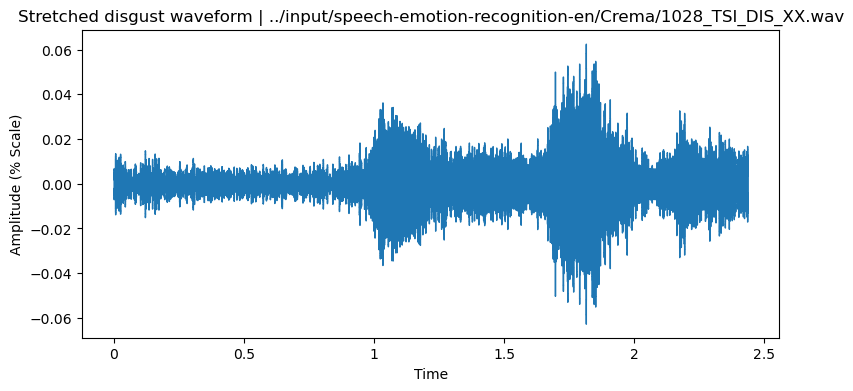

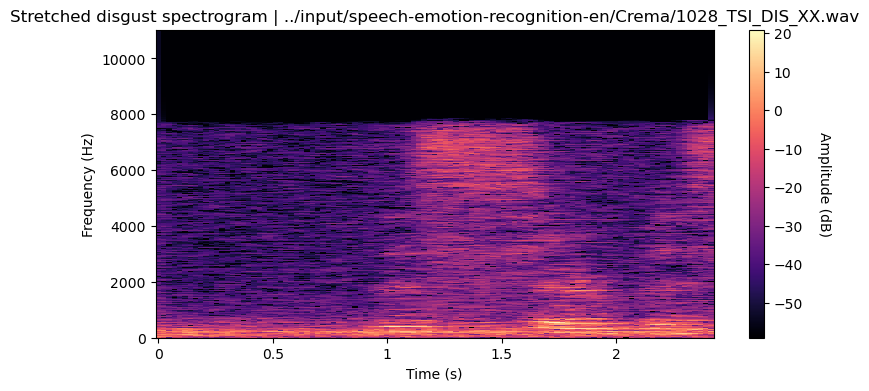

In [12]:
stretched_data = stretch_audio(data)

generate_waveform(emotion, 'stretched', filename, stretched_data, sr).show()
print()
generate_spectrogram(emotion, 'stretched', filename, stretched_data, sr).show()
print()

Audio(data=stretched_data, rate=sr)

To aid the model with its learning, it would also be beneficial to extract key features from the audio and input those features to our model.

The features we will be abstracting are the following:
1. **MFCC (Mel Frequency Cepstral Coefficients)** - Often used to describe timbre in MIR (Music Information Retrieval). As it is related to one of the characteristics of voice and sound, it will be useful when recognizing emotion.
2. **RMS (Root Mean Square)** - Used to describe intensity or amplitude of a sound wave. Emotions can often alter the loudness of one's voice so it will be useful to analyze.
3. **ZCR (Zero Crossing Rate)** - Detects the amount of times a sound wave changes between being positive and negative. Emotions can heighten or lessen this effect so it will be useful.
4. **F0 (Fundamental Frequency)** - "*perceived as pitch, [it] is the first and arguably most salient auditory component humans are exposed*" to and it conveys emotion within human speech, so it will be useful (Liquan Liu, 2022).
5. **Jitter** - Caused by irregular vocal cord vibration which disturbs the frequency of the sound, large irregularities can be correlated to emotion as the cause, which will make it useful for recognition.
6. **Shimmer** - The same as jitter but it disturbs the amplitude of the sound, so it will be useful.
7. **Speech Rate** - Emotions can cause one to talk faster or slower due to stress which will make this useful for identification.

The functions to extract this data are as follows.


In [13]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 76.6 MB/s eta 0:00:00


In [14]:
import parselmouth

def extract_mfcc(data, sr,flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

def extract_rms(data):
    return np.squeeze(librosa.feature.rms(y=data))

def extract_zcr(data):
    return np.squeeze(librosa.feature.zero_crossing_rate(data))

def extract_F0(data,sr):
    '''Extract F0 fundamental frequency from data.'''
    pitches, magnitudes = librosa.piptrack(y=data, sr=sr)
    return pitches[np.argmax(magnitudes, axis=0), np.arange(magnitudes.shape[1])]

# Modified from: https://programtalk.com/python-more-examples/parselmouth.praat.call/
def extract_jitter(filename):
    '''Extract frequency jitter from data.'''
    sound = parselmouth.Sound(filename)
    pointProcess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 600)
    return parselmouth.praat.call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)

# Modified from: https://programtalk.com/python-more-examples/parselmouth.praat.call/
def extract_shimmer(filename):
    '''Extract amplitude shimmer from data.'''
    sound = parselmouth.Sound(filename)
    pointProcess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 600)
    return parselmouth.praat.call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

def extract_speech_rate(data):
    return np.sum(librosa.zero_crossings(data)) / len(data)

Now that we have completed our data augmentation and feature extraction functions, we can now complete the preprocessing step by applying these function to each file in the collective dataframe.

However for each of the audios we can obtain a total of 12 different audios by combining all, some or none of our augmentations together.

They are as follows:
1. Original
2. Noised
3. Pitched higher
4. Pitched lower
5. Stretched
6. Noised and pitched higher
7. Noised and pitched lower
8. Noised and stretched
9. Pitched higher and stretched
10. Pitched lower and stretched
11. Noised, pitched higher and stretched
12. Noised, pitched lower and stretched

First let us create a function to extract all of the features at once.

In [15]:
# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=48
def extract_features(data, sr, path):
    return np.hstack((np.array([]),
      extract_zcr(data),
      extract_rms(data),
      extract_mfcc(data, sr),
      extract_F0(data, sr),
      extract_jitter(path),
      extract_shimmer(path),
      extract_speech_rate(data)
      ))

Now let us extract all these features from each of our augmented audios, including the original audio.

In [16]:
# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=50
def augment_data(df):
    '''Augments the data according to the afore defined functions, then extracts the necessary features from it.'''
    print("Preprocessing data")
    for path, emotion, i in zip(df.path, df.emotion, range(df.path.shape[0])):

        X, Y = [], []
        
        # original data
        duration=2.5
        offset=0.6
        data, sr = librosa.load(path, duration=duration, offset=offset)

        lst = [data]

        # 1 augmentation
        lst.append(add_noise(data)) # noised
        lst.append(pitch_audio(data, sr, pitch_factor=2.0)) # pitched higher
        lst.append(pitch_audio(data, sr, pitch_factor=-2.0)) # pitched lower
        lst.append(stretch_audio(data)) # stretched

        # 2 augmentations
        lst.append(add_noise(lst[2])) # noised pitched higher
        lst.append(add_noise(lst[3])) # noised pitched lower
        lst.append(add_noise(lst[4])) # noised stretched

        lst.append(stretch_audio(lst[2])) # pitched higher stretched
        lst.append(stretch_audio(lst[3])) # pitched lower stretched

        # 3 augmentations
        lst.append(add_noise(lst[8])) # noised pitched higher stretched
        lst.append(add_noise(lst[9])) # noised pitched lower stretched

        # process features
        for element in lst:
            X.append(extract_features(element, sr, path))
            Y.append(emotion)
            
        yield X, Y

        if i % 100 == 0:
            print(f"{i} files have been processed")
            
    print("Done")

In [17]:
processed_df = pd.DataFrame()
Y = []

for x, y in augment_data(df):
    processed_df = pd.concat([processed_df, pd.DataFrame(x)])
    for emo in y:
        Y.append(emo)

processed_df['emotion'] = Y
processed_df = processed_df.fillna(0)

# save features
features_path = "./features.csv"
processed_df.to_csv(features_path, index=False)

Preprocessing data


0 files have been processed


100 files have been processed


200 files have been processed


300 files have been processed


400 files have been processed


500 files have been processed


600 files have been processed


700 files have been processed


800 files have been processed


900 files have been processed


1000 files have been processed


1100 files have been processed


1200 files have been processed


1300 files have been processed


1400 files have been processed


1500 files have been processed


1600 files have been processed


1700 files have been processed


1800 files have been processed


1900 files have been processed


2000 files have been processed


2100 files have been processed


2200 files have been processed


2300 files have been processed


2400 files have been processed


2500 files have been processed


2600 files have been processed


2700 files have been processed


2800 files have been processed


2900 files have been processed


3000 files have been processed


3100 files have been processed


3200 files have been processed


3300 files have been processed


3400 files have been processed


3500 files have been processed


3600 files have been processed


3700 files have been processed


3800 files have been processed


3900 files have been processed


4000 files have been processed


4100 files have been processed


4200 files have been processed


4300 files have been processed


4400 files have been processed


4500 files have been processed


4600 files have been processed


4700 files have been processed


4800 files have been processed


4900 files have been processed


5000 files have been processed


5100 files have been processed


5200 files have been processed


5300 files have been processed


5400 files have been processed


5500 files have been processed


5600 files have been processed


5700 files have been processed


5800 files have been processed


5900 files have been processed


6000 files have been processed


6100 files have been processed


6200 files have been processed


6300 files have been processed


6400 files have been processed


6500 files have been processed


6600 files have been processed


6700 files have been processed


6800 files have been processed


6900 files have been processed


7000 files have been processed


7100 files have been processed


7200 files have been processed


7300 files have been processed


7400 files have been processed


7500 files have been processed


7600 files have been processed


7700 files have been processed


7800 files have been processed


7900 files have been processed


8000 files have been processed


8100 files have been processed


8200 files have been processed


8300 files have been processed


8400 files have been processed


8500 files have been processed


8600 files have been processed


8700 files have been processed


8800 files have been processed


8900 files have been processed


9000 files have been processed


9100 files have been processed


9200 files have been processed


9300 files have been processed


9400 files have been processed


9500 files have been processed


9600 files have been processed


9700 files have been processed


9800 files have been processed


9900 files have been processed


10000 files have been processed


10100 files have been processed


10200 files have been processed


10300 files have been processed


10400 files have been processed


10500 files have been processed


10600 files have been processed


10700 files have been processed


10800 files have been processed


10900 files have been processed


11000 files have been processed


11100 files have been processed


11200 files have been processed


11300 files have been processed


11400 files have been processed


11500 files have been processed


11600 files have been processed


11700 files have been processed


11800 files have been processed


11900 files have been processed


12000 files have been processed


12100 files have been processed


Done


In [18]:
processed_df.shape

(145944, 2488)

In [19]:
processed_df.head()

0         1         2         3         4         5         6  \
0  0.122070  0.187988  0.235840  0.249512  0.249512  0.245605  0.237305   
1  0.122070  0.187012  0.234863  0.249512  0.249512  0.245605  0.237305   
2  0.129395  0.170898  0.231445  0.230957  0.246094  0.265137  0.229980   
3  0.114258  0.167969  0.222168  0.225098  0.226562  0.229492  0.211914   
4  0.111328  0.161621  0.208496  0.213379  0.200195  0.218262  0.224121   

          7         8         9  ...  2478  2479  2480  2481  2482  2483  \
0  0.183594  0.124512  0.073730  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.182617  0.123535  0.073730  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.185547  0.117188  0.067383  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.173828  0.122070  0.075195  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.232910  0.219727  0.168457  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   2484  2485  2486  emotion  
0   0.0   0.0   0.0  disgust  
1   0.0   0.0   0.0  disgust  
2   0.0   0.0   0.0  disgust  
3   0.0   0.0   0.0  disgust  
4   0.0   0.0   0.0  disgust  

[5 rows x 2488 columns]

The preprocessing is now complete.

We have a total of 7 emotion classes to train the models on, which are:
1. anger
2. disgust
3. fear
4. happiness
5. neutral
6. sadness
7. surprise

Now let us input the extracted features into the models.


## Models
We will be conducting a comparison between two models to decide which model performs this recognition task with greater accuracy.

The first model will be the LSTM (Long Short-Term Memory) model and the second model will be the CNN (Convolutional Neural Network) model.

The LSTM model was chosen as the first model since it "*...is able to learn long range dependencies using a combination of forget, input and output gates*" (Hochreiter & Schmidhuber, 1998). Thus for a time based recognition problem like this one, it can be applied.

The CNN Model was chosen as the second model since it "*...uses the already supplied dataset to it for training purposes, and predicts the possible future labels to be assigned*" and "*it processes all the layers, and hence detects all the underlying features, automatically*" (SSLA, 2013). Since our datasets are labeled, this is a prediction/recognition task and we have preprocessed a bunch of the audio's features, it can be applied.


First let us begin with transforming the preprocessed data, such that it can be provided to the models.

To do this let us first split our data into training and testing segments. We will use a standard split where 80% of our data will be used for testing and 20% will be used for evaluation. We will also shuffle the order of the data to avoid getting stuck in a local minimum. The `X` will be the extracted features from every piece of data and `Y` will be the emotion label for those pieces of data.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = processed_df.iloc[:, : -1]
Y = processed_df.iloc[:, -1]

del processed_df

lb = LabelEncoder()
Y = lb.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2, shuffle=True)

del X, Y

Let us also encode the `Y` labels to be an integer which is mapped to one of the seven emotion classes.

In [21]:
from keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_test_one_hot = to_categorical(Y_test, num_classes=7)

del Y_train

Now let us standardize our `X` data like so, to avoid errors within the models.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finally before we use the models let us define some callback functions which we can use to monitor the models.

An early stopping function can be used to stop training if a metric is no longer improving.


In [23]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', mode='auto', patience=5, restore_best_weights=True)

A reduce learning rate function can be used to help the model learn quicker at certain times.

In [24]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

Let's also define the batch size and number of epochs for both models.

In [25]:
epochs = 20
batch_size = 128

# LSTM Model

Let us now define our LSTM model as the following.

* The LSTM layers will be the layers which are mainly tasked with processing the data.
* The Dropout layers will prevent overfitting.
* The Flatten layer will turn the data into something the Dense layer can process.
* The BatchNormalization layer will be used to standardize our data further.
* And finally the Dense layers will be tasked with producing the final classification.

We will use the **rmsprop** optimizer due to its fast convergence on large models. We will also use the **categorical cross-entropy** loss function also known as **softmax**, because of its use for multiclass categorization and because we have one hot encoded our labels.

Here is the model below.

In [26]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Flatten
from keras.metrics import Recall, Precision

def create_LSTM():
    LSTM_model = Sequential()

    LSTM_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
    LSTM_model.add(Dropout(0.2))

    LSTM_model.add(LSTM(64, return_sequences=True))
    LSTM_model.add(Dropout(0.2))

    LSTM_model.add(Flatten())
    LSTM_model.add(Dense(64, activation='relu'))

    LSTM_model.add(BatchNormalization())
    LSTM_model.add(Dense(7, activation='softmax'))

    LSTM_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', Precision(), Recall()])

    LSTM_model.summary()
    
    return LSTM_model

We will now run and save our LSTM model.

In [27]:
def run_LSTM(LSTM_model):
    
    i = len(X_train)//5
    
    LSTM_output = LSTM_model.fit(X_train[i:], Y_train_one_hot[i:], validation_data=(X_train[:i], Y_train_one_hot[:i]),
                        epochs=epochs, batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr])
    
    LSTM_json_path = './LSTM_model.json'
    LSTM_h5_path = './LSTM_model.h5'
    
    with open(LSTM_json_path, 'w') as f:
        f.write(LSTM_model.to_json())
    LSTM_model.save_weights(LSTM_h5_path)

    LSTM_eval = LSTM_model.evaluate(X_test, Y_test_one_hot)
    LSTM_Y_pred = LSTM_model.predict(X_test)
    
    return LSTM_output, LSTM_eval, LSTM_Y_pred

In [28]:
import time

LSTM_start = time.time()
LSTM_output, LSTM_eval, LSTM_Y_pred = run_LSTM(create_LSTM())
LSTM_end = time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2487, 128)         66560     
                                                                 
 dropout (Dropout)           (None, 2487, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 2487, 64)          49408     
                                                                 
 dropout_1 (Dropout)         (None, 2487, 64)          0         
                                                                 
 flatten (Flatten)           (None, 159168)            0         
                                                                 
 dense (Dense)               (None, 64)                10186816  
                                                                 
 batch_normalization (BatchN  (None, 64)               2

### CNN Model

Let us now define our CNN model as the following.

* The Conv1D layers will be the layers which are mainly tasked with processing the data.
* The BatchNormalization layers will be used to standardize our data further.
* The MaxPooling1D layers will reduce the size of our data.
* The Flatten layer will turn the data into something the Dense layer can process.
* And finally the Dense layers will be tasked with producing the final classification.

We will use the **rmsprop** optimizer due to its fast convergence on large models. We will also use the **categorical cross-entropy** loss function also known as **softmax**, because of its use for multiclass categorization and because we have one hot encoded our labels.

Here is the model below.

In [29]:
from keras.layers import Conv1D, MaxPooling1D

# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=68
def create_CNN():
    CNN_model = Sequential()

    CNN_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

    CNN_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
    CNN_model.add(BatchNormalization())
    CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

    CNN_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
    CNN_model.add(BatchNormalization())
    CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

    CNN_model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
    CNN_model.add(BatchNormalization())
    CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

    CNN_model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
    CNN_model.add(BatchNormalization())
    CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

    CNN_model.add(Flatten())
    CNN_model.add(Dense(512, activation='relu'))

    CNN_model.add(BatchNormalization())
    CNN_model.add(Dense(7, activation='softmax'))

    CNN_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', Precision(), Recall()])

    CNN_model.summary()
    
    return CNN_model

We will now run and save our CNN model.

In [30]:
def run_CNN(CNN_model):
    
    i = len(X_train)//5
    
    CNN_output = CNN_model.fit(X_train[i:], Y_train_one_hot[i:], validation_data=(X_train[:i], Y_train_one_hot[:i]),
                        epochs=epochs, batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr])

    CNN_json_path = './CNN_model.json'
    CNN_h5_path = './CNN_model.h5'
    
    with open(CNN_json_path, 'w') as f:
        f.write(CNN_model.to_json())
    CNN_model.save_weights(CNN_h5_path)

    CNN_eval = CNN_model.evaluate(X_test, Y_test_one_hot)
    CNN_Y_pred = CNN_model.predict(X_test)
    
    return CNN_output, CNN_eval, CNN_Y_pred

In [31]:
CNN_start = time.time()
CNN_output, CNN_eval, CNN_Y_pred = run_CNN(create_CNN())
CNN_end = time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2487, 512)         3072      
                                                                 
 batch_normalization_1 (Batc  (None, 2487, 512)        2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1244, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1244, 512)         1311232   
                                                                 
 batch_normalization_2 (Batc  (None, 1244, 512)        2048      
 hNormalization)                                                 
                                                      

Now that we have run both of our models, let's examine and compare the results.

## Results
To be able to understand the results fully we must first reason why the metrics we will be using are appropriate.

1. **Accuracy** - It is quite natural and intuitive to use this for this recognition task, since our dataset is finite and labeled. Thus accuracy can appropriately be used as a metric for our models.
2. **Recall** - As it aims to identify the proportion of true positives in the relevant emotion and since our dataset is finite and labeled, like accuracy it can also be appropriately used as a metric.
3. **Precision** - As it aims to identify the proportion of correctly classified emotions within the model's choice and since our dataset is finite and labeled, it is an appropriate metric.
4. **F1-Score** - It is a combination of the recall and precision metrics and it identifies what percentage of classifications by the model was correct. Since our dataset is finite and labeled, it is an appropriate metric.

With this in mind let us now observe the results.


First let us compare the accuracies of the two models to get a general sense of which model can recognize the emotions better.

The accuracy of the LSTM model is: 88.33%
The accuracy of the CNN model is: 94.9%


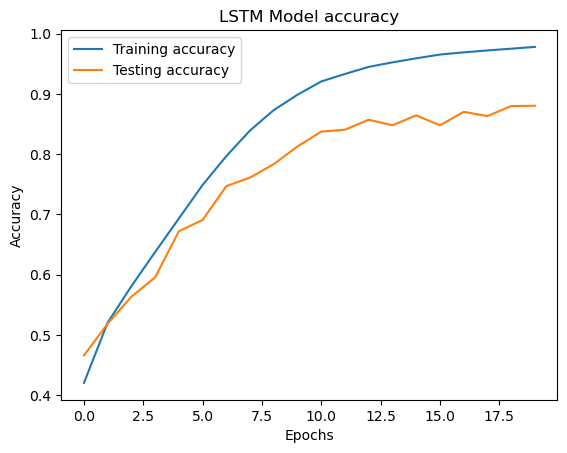

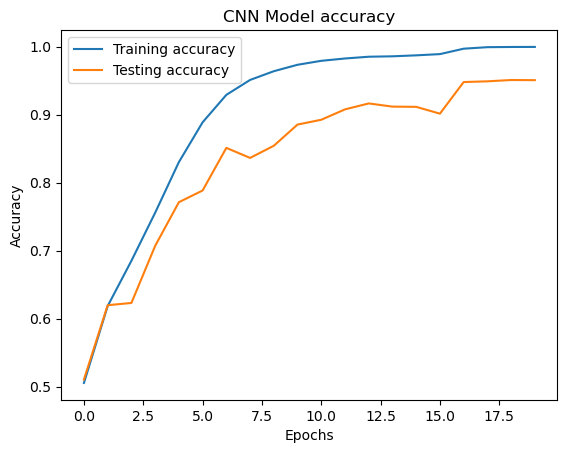

In [32]:
print(f'The accuracy of the LSTM model is: {round(LSTM_eval[1]*100, 2)}%')
print(f'The accuracy of the CNN model is: {round(CNN_eval[1]*100, 2)}%')

# Modified from: https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d?scriptVersionId=57350093&cellId=72
def plot_accuracy(model, output):
    '''Plots the accuracy of the model compared to its epoch.'''
    
    train_acc = output.history['acc']
    test_acc = output.history['val_acc']
    
    ticks = [i for i in range(len(train_acc))]

    plt.plot(ticks, train_acc, label='Training accuracy')
    plt.plot(ticks, test_acc, label='Testing accuracy')
    plt.title(f'{model} Model accuracy')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    
    return plt

plot_accuracy('LSTM', LSTM_output).show()
plot_accuracy('CNN', CNN_output).show()

Thus after 20 epochs we can see that the CNN model has the higher accuracy.

Let us also visualize the confusion matrix, along with the recall, precision and f1-score. The predicted values are the model's classification of the results and the actual values are the datasets classification of the results.

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Modified from: https://www.kaggle.com/code/ahmedabdelmon3m/speech-emotion-recognition?scriptVersionId=96230704&cellId=12
def print_stats(model, Y_test, Y_pred, encoder):
    '''Prints the metrics along with returning the confusion matrix plot.'''
    print(f'\n{model} Model\n{"-"*(len(model)+6)}')
    print(classification_report(Y_test , Y_pred, target_names=encoder.classes_))

    cm = confusion_matrix(Y_test, Y_pred, labels=list(range(0, 7)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
    disp.plot()
    
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.xticks(rotation = 30)
    plt.ylabel('Actual Values')
    
    return plt

# Modified from: https://www.kaggle.com/code/ahmedabdelmon3m/speech-emotion-recognition?scriptVersionId=96230704&cellId=12
def mapping(arr):
    '''Maps arr to the different emotion classes.'''
    pred = []
    for i in range(len(arr)):
        idx = 0
        max = 0
        for j in range(7):
            if arr[i][j] > max:
                max = arr[i][j]
                idx = j
        pred.append(idx)
    return pred


LSTM Model
----------
              precision    recall  f1-score   support

       anger       0.91      0.91      0.91      4641
     disgust       0.84      0.90      0.87      4580
        fear       0.89      0.84      0.87      4615
   happiness       0.88      0.87      0.88      4547
     neutral       0.91      0.89      0.90      4614
     sadness       0.86      0.89      0.88      4577
    surprise       0.92      0.88      0.90      1615

    accuracy                           0.88     29189
   macro avg       0.89      0.88      0.89     29189
weighted avg       0.88      0.88      0.88     29189



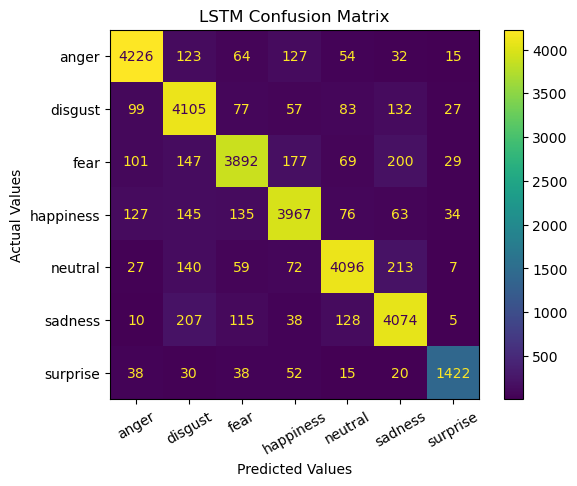


CNN Model
---------
              precision    recall  f1-score   support

       anger       0.95      0.96      0.96      4641
     disgust       0.94      0.95      0.95      4580
        fear       0.95      0.92      0.94      4615
   happiness       0.94      0.93      0.94      4547
     neutral       0.95      0.97      0.96      4614
     sadness       0.95      0.96      0.95      4577
    surprise       0.97      0.96      0.97      1615

    accuracy                           0.95     29189
   macro avg       0.95      0.95      0.95     29189
weighted avg       0.95      0.95      0.95     29189



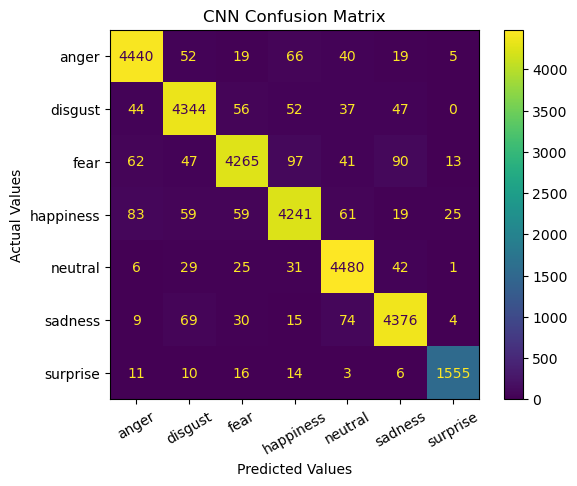

In [34]:
print_stats('LSTM', list(Y_test), mapping(LSTM_Y_pred), lb).show()
print_stats('CNN', list(Y_test), mapping(CNN_Y_pred), lb).show()

From comparing the outputs of the two confusion matrices it is obvious that the CNN is more accurate but they both still have trouble on some emotions. The LSTM model has the most trouble with sadness as it often categorizes it as neutral. This is an explainable mistake however as they are both calm, not particularly loud but are rather smooth. The CNN model has the most trouble categorizing happiness as anger. This is also explainable as they are both loud and energetic, however to a human they would be easily distinguishable due the two emotions being seen as almost opposite to each other.

Since the CNN model has higher results in all of the metrics, it should be conclusive to say the CNN model is better. But is that truly the case?


## Discussion
The CNN model might have better results when it comes to the metrics but they are not the only factors that matter. It is also wise to ask which is quicker or which model is more space efficient.

To answer the question of which model is faster let us just subtract the end time from the beginning time like so.

In [35]:
print(f'The LSTM model took {LSTM_end - LSTM_start} seconds to run')
print(f'The CNN model took {CNN_end - CNN_start} seconds to run')

The LSTM model took 7565.2352821826935 seconds to run
The CNN model took 5277.595891237259 seconds to run


So clearly the CNN model is still superior when it comes to speed. However when it comes to size it is the LSTM model which is a more space efficient model. The total number of parameters the CNN model has is 12,600,583, whereas the LSTM model only has 10,303,495 parameters. But then this naturally elicits the question, why is the LSTM model slower, which elicits the question, how does the LSTM model work?

Well like a RNN (Recurrent Neural Network) it recurs, but it also maintains an extra context layer which is propagated back into the recurrence. Three gates, input, forget and output, are also used to describe what the model should remember and forget from its previous calculations.
So we would like to propose that we have perhaps extracted too much data for the size of this model.

When also comparing the CNN model to the one we modified it from, which is from this notebook [here](https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d), we can observe that Dmitry Babko extracts only extracts 3 features from the data whereas we extract 7. We must be overfitting then as the accuracy of his model which is 96.03% trumps our 94.9%.

But in the scope of this notebook only, the CNN model is outperforming the LSTM model in accuracy while the LSTM layer accounts for overfitting by having dropout layers. Thus not dropping any nodes and max pooling must lead to higher accuracies.

Still the strength of our models are their metric scores which average above 90%, while the weaknesses would have to be the speed and space inefficiency.

We have also limited the scope of our model by only including the emotions originally proposed by Paul Ekman. It would be wise for future work to work more in depth with the emotions as many unique emotions such as annoyance probably get categorized under a 'superior' emotion like anger. Another improvement to make in the future would entail combining the two models together. Since the LSTM has superb memory capabilities and the CNN is fantastic at signal processing and key feature identification, it would create a powerful model if we were to combine their strengths together.


## Acknowledgements
Thanks to Dmitry Babko who compiled the dataset and thanks to the teams who originally created the datasets.

## References

1. Anon. (2021). *Introduction to Signal Levels*. Discovery of Sound in the Sea. Retrieved July 27, 2023, from https://dosits.org/science/advanced-topics/introduction-to-signal-levels/

2. Anon. (n.d.). *Mel Frequency Cepstral Coefficients (MFCCs)*. Music Information Retrieval. Retrieved July 26, 2023 from https://musicinformationretrieval.com/mfcc.html

3. Babko, D. (2020). *Speech Emotion Recognition (en)*. Kaggle. Retrieved July 17, 2023, from https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en

4. Bäckström, T., Räsänen, O., Zewoudie, A., Zarazaga, P., Koivusalo, L., Das, S. (2022). *Introduction to Speech Processing*. Aatlo University Wiki. Retrieved July 23, 2023, from https://wiki.aalto.fi/display/ITSP/Introduction+to+Speech+Processing

5. Burton, R. (2015). *The elements of music: What are they, and who cares?* Music: Educating for life. ASME XXth National Conference Proceedings. Australian Society for Music Education. Retrieved July 25, 2023 from https://search.informit.org/doi/10.3316/informit.649996699786780

6. Cao, H., Cooper, D. G., Keutmann, M. K., Gur, R. C., Nenkova, A., & Verma, R. (2014). *CREMA-D: Crowd-sourced Emotional Multimodal Actors Dataset. IEEE transactions on affective computing*, 5(4), 377–390. https://doi.org/10.1109/TAFFC.2014.2336244

7. Dupuis, K., Pichora-Fuller, K. (2010). *Toronto emotional speech set (TESS)*. University of Toronto, Psychology Department. Retrieved July 25, 2023 from https://tspace.library.utoronto.ca/handle/1807/24487

8. Giannakopoulos, T., Pikrakis, A., (2014). *Introduction to Audio Analysis*. Science Direct. Retrieved July 27, 2023, from https://www.sciencedirect.com/topics/engineering/zero-crossing-rate

9. Jackson, P., Haq, S. (2015). *Corpus design*. Kahlan. Retrieved July 25, 2023 from http://kahlan.eps.surrey.ac.uk/savee/Database.html

10. Liu, L., Götz, A., Lorette, P., Tyler, M. (2022). *How Tone, Intonation and Emotion Shape the Development of Infants’ Fundamental Frequency Perception*. Sec. Psychology of Language. Retrieved July 28, 2023, from https://doi.org/10.3389/fpsyg.2022.906848

11. Livingstone, S. R., & Russo, F. A. (2018). *The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English*. PloS one, 13(5), e0196391. https://doi.org/10.1371/journal.pone.0196391

12. Patel, N., Patel, S., & Mankad, S. H. (2022). *Impact of autoencoder based compact representation on emotion detection from audio. Journal of ambient intelligence and humanized computing*, 13(2), 867–885. https://doi.org/10.1007/s12652-021-02979-3

13. Seo, M., & Kim, M. (2020). *Fusing Visual Attention CNN and Bag of Visual Words for Cross-Corpus Speech Emotion Recognition*. Sensors (Basel, Switzerland), 20(19), 5559. https://doi.org/10.3390/s20195559


